In [1]:
from experiment import Experiment
from utils.behavior_data import BehaviorData
from visuals import Plotter
import torch
import numpy as np
from utils.state_data import StateData
import matplotlib.pyplot as plt

268 537
(6904, 56) (6904, 8)
0	 [0.30067941546440125]
5	 [0.24552233517169952]
10	 [0.2313358336687088]
15	 [0.22297297418117523]
20	 [0.22108474373817444]
25	 [0.21429584920406342]
30	 [0.20102129876613617]
35	 [0.1980150043964386]
40	 [0.19168776273727417]
45	 [0.1903572678565979]
50	 [0.18875226378440857]
55	 [0.1880117654800415]
60	 [0.18719050288200378]
65	 [0.186676487326622]
70	 [0.18624942004680634]
75	 [0.18593595921993256]
80	 [0.18564176559448242]
85	 [0.1853838413953781]
90	 [0.1851547509431839]
95	 [0.18494968116283417]
100	 [0.18476533889770508]
105	 [0.18460232019424438]
110	 [0.18445740640163422]
115	 [0.18432608246803284]
120	 [0.18420594930648804]
125	 [0.18410590291023254]
130	 [0.18401271104812622]
135	 [0.18392564356327057]
140	 [0.1838439404964447]
145	 [0.18376681208610535]
150	 [0.18369366228580475]
155	 [0.18362388014793396]
160	 [0.18355679512023926]
165	 [0.18349160254001617]
170	 [0.18342727422714233]
175	 [0.18336230516433716]
180	 [0.18329419195652008]
185

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

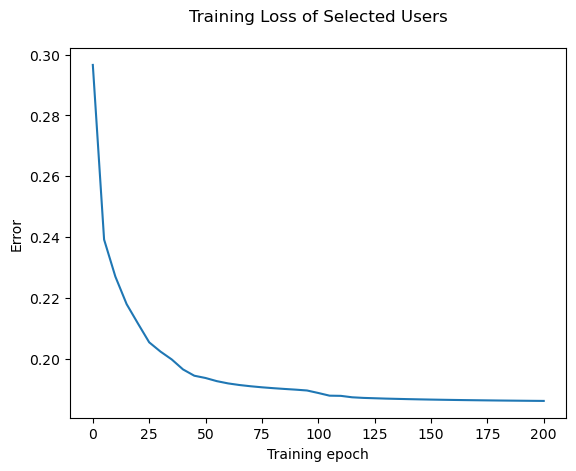

In [2]:
for respond_perc in [.5]:
# for respond_perc in [.75]:
    for estate, include_state, fullq in [(True, True, False)]:
    # for estate, include_state in [(True, True), (False, True), (False, False)]:
        # for model in ["AdaptableLSTM", "BasicNN"]:
        for model in ["LogisticRegressor"]:
            for learning_rate in [.03]:
                test_metrics, train_metrics, adjusted_losses = [], [], []
                epochs = 200
                for seed in range(5):
                    np.random.seed(seed)
                    torch.manual_seed(seed)
                    e = Experiment(
                        numValFolds = 5,
                        data_kw={"minw": 2,
                                "maxw": 29,
                                "include_state": include_state,
                                "include_pid": False,
                                "expanded_states": estate,
                                "top_respond_perc": respond_perc,
                                "full_questionnaire": fullq},
                        model=model,
                        model_kw={
                            "lossfn": "MSELoss",
                            # "lossfn": "NDCG",
                            # "lossfn": "CrossEntropyLoss",
                            "hidden_size": 200, 
                            "opt_kw": {
                                "lr": learning_rate
                            }
                        },
                        train_kw={
                            "epochs": epochs,
                            "n_subj": 500,
                            "rec_every": 5,
                        })

                    report = e.runValidation()



                    individual_test_scores, labels = e.report_scores_individual_test()
                    individual_train_scores, labels = e.report_scores_individual_train()



                    dire = "./validation_experiment_output/"
                    fileprefix = f"{model}LR{learning_rate}Resp{respond_perc}States{int(include_state)}Expanded{int(estate)}"
                    np.savetxt(f"{dire}TRAINMETRICS-{fileprefix}S{seed}.csv", report["train_metrics"], delimiter = ',', header = ','.join(report['metric_labels']))
                    np.savetxt(f"{dire}TESTMETRICS-{fileprefix}S{seed}.csv", report["test_metrics"], delimiter = ',', header = ','.join(report['metric_labels']))
                    np.savetxt(f"{dire}IDVDTESTMETRICS-{fileprefix}S{seed}.csv", individual_test_scores, delimiter = ',', header = ','.join(report['metric_labels']))
                    np.savetxt(f"{dire}IDVDTRAINMETRICS-{fileprefix}S{seed}.csv", individual_train_scores, delimiter = ',', header = ','.join(report['metric_labels']))
                    np.savetxt(f"{dire}TRAINLOSSES-{fileprefix}S{seed}.csv", report["loss"], delimiter = ',')

                    plt.clf()
                    splot = plt.scatter(individual_test_scores[:, -1], individual_test_scores[:, -2])
                    plt.title("Test Accuracy vs Response Count")
                    plt.savefig(f"{dire}/img/TestACCvResponse-{fileprefix}S{seed}.png")
                    plt.clf()
                    splot = plt.scatter(individual_train_scores[:, -1], individual_train_scores[:, -2])
                    plt.title("Train Accuracy vs Response Count")
                    plt.savefig(f"{dire}/img/TrainACCvResponse-{fileprefix}S{seed}.png")
                    plt.clf()


                    writer = open(f"{dire}ALOSS-{fileprefix}.csv", "a")
                    writer.write(",".join([str(loss[0]) for loss in report["loss"]]))
                    writer.write("\n")
                    writer.close()

                    writer = open(f"{dire}FINALTRAINMETRICS-{fileprefix}.csv", "a")
                    writer.write(",".join([str(loss) for loss in report["train_metrics"][-1, :]]))
                    writer.write("\n")
                    writer.close()

                    writer = open(f"{dire}FINALTESTMETRICS-{fileprefix}.csv", "a")
                    writer.write(",".join([str(loss) for loss in report["test_metrics"][-1, :]]))
                    writer.write("\n")
                    writer.close()

                    Plotter.training_loss(report, dire)

